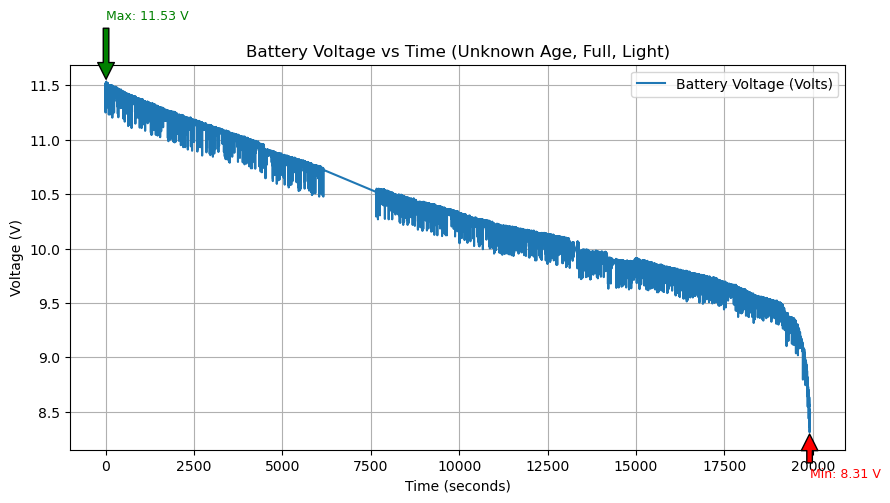

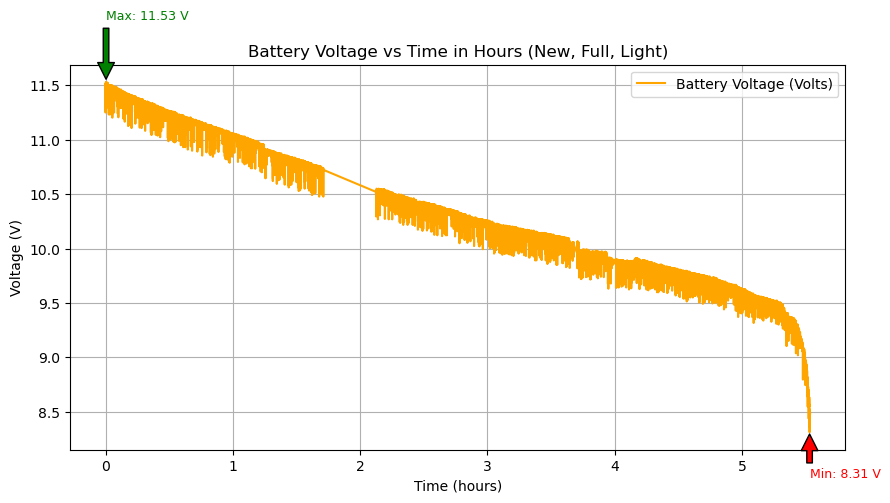

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
df = pd.read_csv('new_battery_log.csv')

# Adjust utime to start from 0
df['utime'] = df['utime'] - df['utime'].iloc[0]

# Compress time when utime difference >= 100 and voltage difference < 0.1
for i in range(1, len(df)):
    time_diff = df.loc[i, 'utime'] - df.loc[i - 1, 'utime']
    voltage_diff = abs(df.loc[i, 'battery_voltage'] - df.loc[i - 1, 'battery_voltage'])

    if time_diff >= 100 and voltage_diff < 0.1:
        shift_amount = time_diff - 1  # Compressing the time difference
        df.loc[i:, 'utime'] -= shift_amount

# Create a new column for hours after adjustment
df['hours'] = df['utime'] / 3600

# Plot the battery voltage vs time in seconds
plt.figure(figsize=(10, 5))
plt.plot(df['utime'], df['battery_voltage'], label='Battery Voltage (Volts)')

# Label the highest and lowest voltage values
max_voltage = df['battery_voltage'].max()
min_voltage = df['battery_voltage'].min()
plt.annotate(f'Max: {max_voltage:.2f} V', xy=(df['utime'][df['battery_voltage'].idxmax()], max_voltage),
             xytext=(df['utime'][df['battery_voltage'].idxmax()], max_voltage * 1.05),
             arrowprops=dict(facecolor='green', shrink=0.05), fontsize=9, color='green')
plt.annotate(f'Min: {min_voltage:.2f} V', xy=(df['utime'][df['battery_voltage'].idxmin()], min_voltage),
             xytext=(df['utime'][df['battery_voltage'].idxmin()], min_voltage * 0.95),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=9, color='red')

# Label the axes for the first plot
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (V)')

# Add a title (age, starting voltage, workload)
plt.title('Battery Voltage vs Time (Unknown Age, Full, Light)')

# Add a grid for better readability
plt.grid(True)

# Show the legend and plot
plt.legend()
plt.show()

# Plot the battery voltage vs time in hours
plt.figure(figsize=(10, 5))
plt.plot(df['hours'], df['battery_voltage'], label='Battery Voltage (Volts)', color='orange')

# Label the highest and lowest voltage values
plt.annotate(f'Max: {max_voltage:.2f} V', xy=(df['hours'][df['battery_voltage'].idxmax()], max_voltage),
             xytext=(df['hours'][df['battery_voltage'].idxmax()], max_voltage * 1.05),
             arrowprops=dict(facecolor='green', shrink=0.05), fontsize=9, color='green')
plt.annotate(f'Min: {min_voltage:.2f} V', xy=(df['hours'][df['battery_voltage'].idxmin()], min_voltage),
             xytext=(df['hours'][df['battery_voltage'].idxmin()], min_voltage * 0.95),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=9, color='red')

# Label the axes for the second plot
plt.xlabel('Time (hours)')
plt.ylabel('Voltage (V)')

# Add a title for the second plot
plt.title('Battery Voltage vs Time in Hours (New, Full, Light)')

# Add a grid for better readability
plt.grid(True)

# Show the legend and plot
plt.legend()
plt.show()


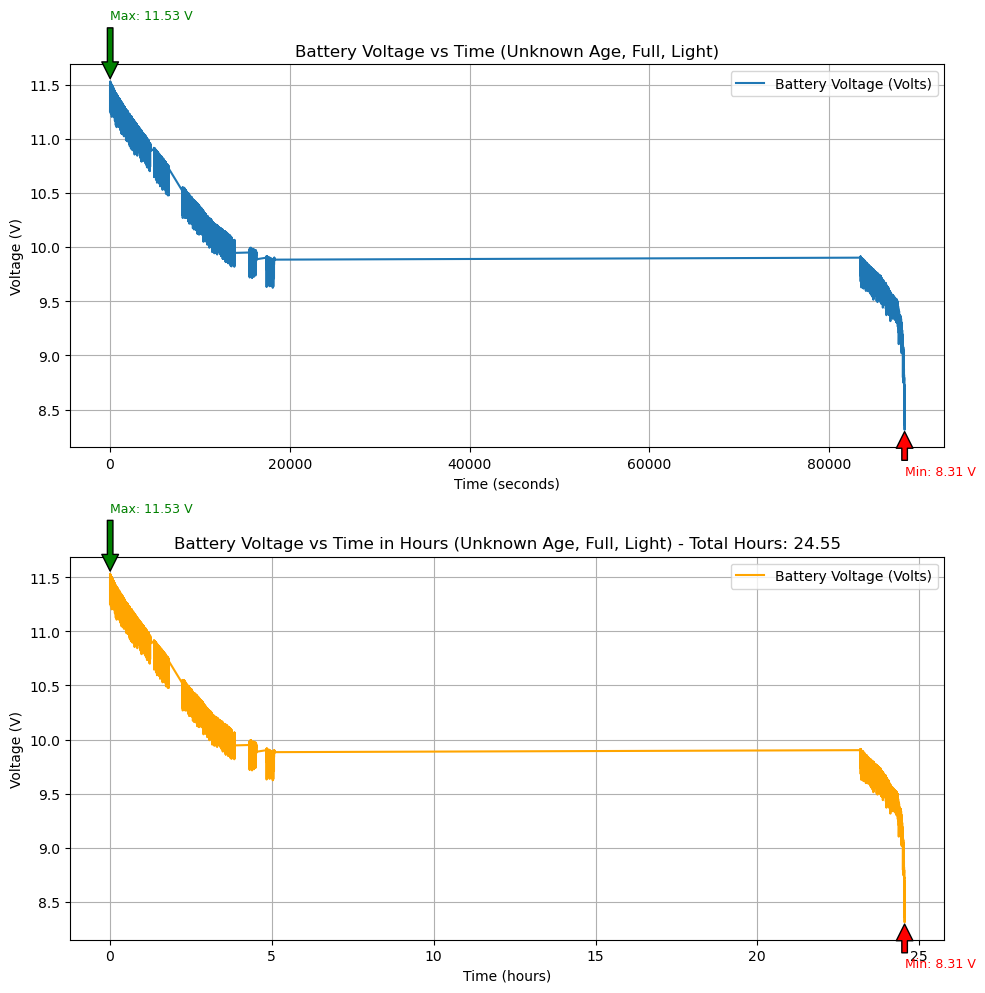

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
df = pd.read_csv('mbot_battery_log.csv')

# Adjust utime to start from 0
df['utime'] = df['utime'] - df['utime'].iloc[0]

# Create a new column for hours
df['hours'] = df['utime'] / 3600

# Calculate total hours
total_hours = df['hours'].iloc[-1]

# Plot the battery voltage vs time in seconds and hours
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot the battery voltage vs time in seconds
ax1.plot(df['utime'], df['battery_voltage'], label='Battery Voltage (Volts)')

# Label the highest and lowest voltage values
max_voltage = df['battery_voltage'].max()
min_voltage = df['battery_voltage'].min()
ax1.annotate(f'Max: {max_voltage:.2f} V', xy=(df['utime'][df['battery_voltage'].idxmax()], max_voltage), xytext=(df['utime'][df['battery_voltage'].idxmax()], max_voltage * 1.05),
             arrowprops=dict(facecolor='green', shrink=0.05), fontsize=9, color='green')
ax1.annotate(f'Min: {min_voltage:.2f} V', xy=(df['utime'][df['battery_voltage'].idxmin()], min_voltage), xytext=(df['utime'][df['battery_voltage'].idxmin()], min_voltage * 0.95),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=9, color='red')

# Label the axes for the first plot
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Voltage (V)')
ax1.set_title('Battery Voltage vs Time (Unknown Age, Full, Light)')
ax1.grid(True)
ax1.legend()

# Plot the battery voltage vs time in hours
ax2.plot(df['hours'], df['battery_voltage'], label='Battery Voltage (Volts)', color='orange')

# Label the highest and lowest voltage values
ax2.annotate(f'Max: {max_voltage:.2f} V', xy=(df['hours'][df['battery_voltage'].idxmax()], max_voltage), xytext=(df['hours'][df['battery_voltage'].idxmax()], max_voltage * 1.05),
             arrowprops=dict(facecolor='green', shrink=0.05), fontsize=9, color='green')
ax2.annotate(f'Min: {min_voltage:.2f} V', xy=(df['hours'][df['battery_voltage'].idxmin()], min_voltage), xytext=(df['hours'][df['battery_voltage'].idxmin()], min_voltage * 0.95),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=9, color='red')

# Label the axes for the second plot
ax2.set_xlabel('Time (hours)')
ax2.set_ylabel('Voltage (V)')
ax2.set_title(f'Battery Voltage vs Time in Hours (Unknown Age, Full, Light) - Total Hours: {total_hours:.2f}')
ax2.grid(True)
ax2.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()